### 시계열 데이터의 결측치

- 근처값으로 대체
- 시계열 변수인 경우에는 결측이 바로 이전 값 혹은 이후 값과 유사할 가능성이 높음

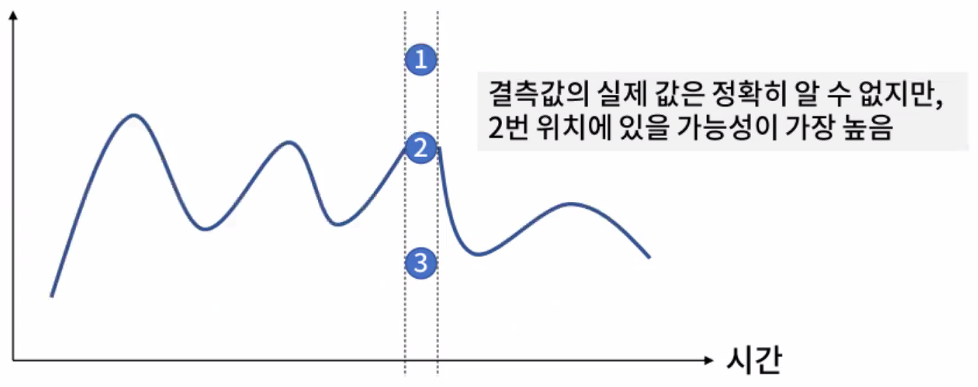

#### DataFrame.fillna(value, method)

- value : 결측치를 대체할 값
- method : 결측치를 대체할 방법
    - ffill : 결측치 이전의 유효한 값 가운데 가장 가까운 값으로 채움
    - bfill : 결측치 이후의 유효한 값 가운데 가장 가까운 값으로 채움

- 데이터를 train_test_split를 이용하여 임의로 분할한 경우에는 적용이 불가능
- 분할하기 전에 결측치 대체가 이루어져야 함

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
df = pd.read_excel('./data/AirQuality.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


In [3]:
df.shape

(510, 17)

In [4]:
df.isnull().sum()

Date               0
Time               0
CO(GT)             1
PT08.S1(CO)        2
NMHC(GT)           2
C6H6(GT)          10
PT08.S2(NMHC)      4
NOx(GT)            6
PT08.S3(NOx)       7
NO2(GT)            6
PT08.S4(NO2)       6
PT08.S5(O3)        1
T                  0
RH                 0
AH                 0
Unnamed: 15      510
Unnamed: 16      510
dtype: int64

In [5]:
df = df.fillna(method='ffill').fillna(method='bfill')
# 결측 데이터 이전에서 유효한 값으로 채우고 유효한 값이 없으면 이후에 유효한 값으로 채움

In [6]:
df.isnull().sum()

Date               0
Time               0
CO(GT)             0
PT08.S1(CO)        0
NMHC(GT)           0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
Unnamed: 15      510
Unnamed: 16      510
dtype: int64